In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
os.path.join('data','happy')

'data\\happy'

In [4]:
os.listdir('data')

['happy', 'sad']

In [5]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       0.13.0
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
anyio                         3.6.1
argon2-cffi                   20.1.0
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
bcrypt                        4.0.0
bleach                        4.1.0
cachetools                    4.2.2
certifi                       2021.5.30
cffi                          1.14.6
chardet                       4.0.0
charset-normalizer            2.1.1
click                         8.1.3
cloudpickle                   2.2.0
cmake                         3.24.1.1
colorama                      0.4.4
cryptography                  38.0.1
cycler                        0.10.

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
import cv2
import imghdr

In [9]:
data_dir='data'
image_exts=['jpg','jpeg','bmp','png']

In [10]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'Happy-people-800x533.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'HappyPeopleBanner.png',

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Load data

In [12]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator=data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
batch=data_iterator.next()

In [17]:
batch

(array([[[[ 89.52101  ,  73.54445  ,  48.23207  ],
          [ 43.403107 ,  21.614044 ,  23.981232 ],
          [116.061844 ,  94.94466  ,  91.5753   ],
          ...,
          [ 83.21741  ,  75.35977  ,  72.711334 ],
          [ 97.75011  ,  93.69229  ,  82.313126 ],
          [141.22588  , 139.61845  , 119.01103  ]],
 
         [[112.084915 ,  94.10835  ,  71.659134 ],
          [ 65.70656  ,  43.77687  ,  45.284683 ],
          [131.10019  , 110.80527  , 104.88469  ],
          ...,
          [135.13168  , 125.2697   , 122.95979  ],
          [ 57.699356 ,  49.054825 ,  39.31459  ],
          [105.714966 ,  95.60364  ,  75.209625 ]],
 
         [[ 82.82294  ,  61.74872  ,  44.81317  ],
          [ 92.29753  ,  68.362625 ,  66.083984 ],
          [166.02974  , 145.9169   , 137.31143  ],
          ...,
          [136.90309  , 125.82887  , 121.52898  ],
          [ 18.139175 ,   4.962738 ,   2.9425507],
          [111.20116  ,  95.20116  ,  72.20116  ]],
 
         ...,
 
         [[1

In [18]:
len(batch) #images and levels

2

In [19]:
len(batch[0]),batch[0].shape

(32, (32, 256, 256, 3))

In [20]:
len(batch[1])

32

In [21]:
batch[1]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

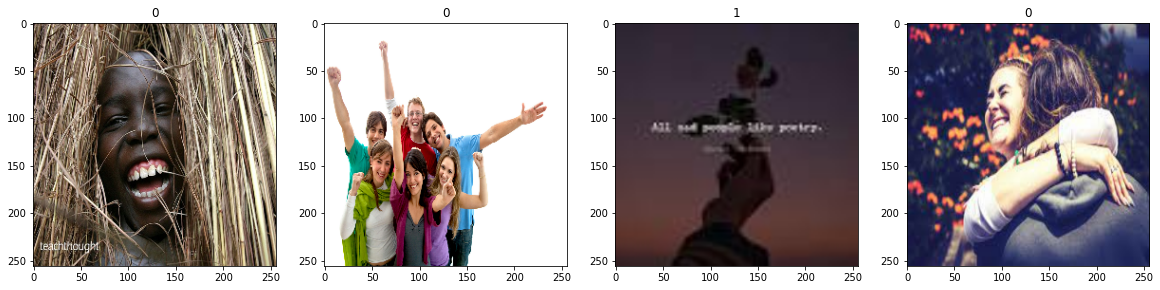

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing data

In [23]:
batch[0].min(),batch[0].max()

(0.0, 255.0)

In [24]:
data=data.map(lambda x,y:(x/255,y))

In [25]:
data.as_numpy_iterator().next()[0].max()

1.0

In [26]:
data.as_numpy_iterator().next()[0].min()

0.0

Split Data

In [27]:
len(data)

10

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [29]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [30]:
len(train)

7

In [31]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [33]:
model=Sequential()

In [34]:
#convulation and maxpolling layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#convulation and maxpolling layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#convulation and maxpolling layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flattering
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 230ms/step - loss: 0.8587 - accuracy: 0.4821 - val_loss: 0.6777 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 2s 226ms/step - loss: 0.6780 - accuracy: 0.4911 - val_loss: 0.6541 - val_accuracy: 0.4688
Epoch 3/20
7/7 [==============================] - 2s 225ms/step - loss: 0.5992 - accuracy: 0.7009 - val_loss: 0.4644 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 2s 233ms/step - loss: 0.5861 - accuracy: 0.7098 - val_loss: 0.5013 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 2s 232ms/step - loss: 0.5510 - accuracy: 0.8214 - val_loss: 0.4547 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 2s 234ms/step - loss: 0.4210 - accuracy: 0.8170 - val_loss: 0.3140 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 2s 230ms/step - loss: 0.3517 - accuracy: 0.8839 - val_loss: 0.2268 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

In [40]:
hist.history

{'loss': [0.858738899230957,
  0.6779590249061584,
  0.5991880297660828,
  0.5860998034477234,
  0.5509763360023499,
  0.421021968126297,
  0.3517105281352997,
  0.26157933473587036,
  0.1639239341020584,
  0.2080143690109253,
  0.10600034147500992,
  0.07372062653303146,
  0.061765216290950775,
  0.03341307491064072,
  0.019596945494413376,
  0.04734904319047928,
  0.029227564111351967,
  0.015464735217392445,
  0.019930023699998856,
  0.009142323397099972],
 'accuracy': [0.4821428656578064,
  0.4910714328289032,
  0.7008928656578064,
  0.7098214030265808,
  0.8214285969734192,
  0.8169642686843872,
  0.8839285969734192,
  0.9107142686843872,
  0.9508928656578064,
  0.9241071343421936,
  0.9776785969734192,
  0.9866071343421936,
  0.9866071343421936,
  0.9955357313156128,
  1.0,
  0.9866071343421936,
  0.9866071343421936,
  1.0,
  0.9910714030265808,
  0.9910714030265808],
 'val_loss': [0.6776679158210754,
  0.6540913581848145,
  0.46442851424217224,
  0.5012894868850708,
  0.45468574

Plot performance

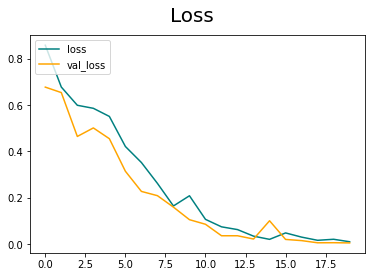

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

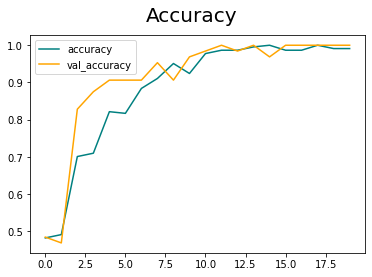

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [51]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


In [47]:
import cv2

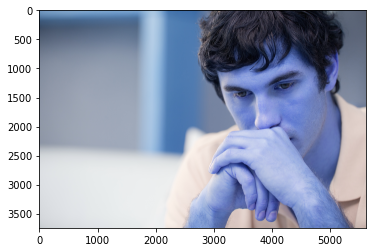

In [88]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

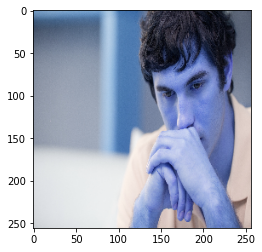

In [89]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [91]:
yhat

array([[0.99956876]], dtype=float32)

In [92]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','imageclassifier.h5'))